In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib
from plotnine import *
import pandas as pd
import numpy as np
import scanpy as sc
from data_loader import load_data
from prismo import PRISMO
from prismo.pl import plot_variance_explained, plot_training_curve

tab20_colors = [matplotlib.cm.tab20(i) for i in range(20)]
tab20_colors = [matplotlib.colors.rgb2hex(color) for color in tab20_colors]

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
data = load_data()
model = PRISMO.load("model.h5")

In [78]:
z = model.get_factors()

z_list = []
for group in z.keys():
    df = z[group].reset_index(names="barcode")
    df["x"] = model.covariates[group][:, 0]
    df["y"] = model.covariates[group][:, 1]
    df["state"] = model._metadata[group]["rna"]["State"].values
    df["epi_domain"] = model._metadata[group]["rna"]["epi_domain"].values
    df = df.melt(id_vars=["barcode", "x", "y", "state", "epi_domain"], var_name="factor", value_name="score")
    df["group"] = group

    z_list.append(df)

z_long = pd.concat(z_list)
z_long_grouped = z_long.groupby(["state", "factor"])["score"].agg(["max", "mean", "std"]).reset_index()

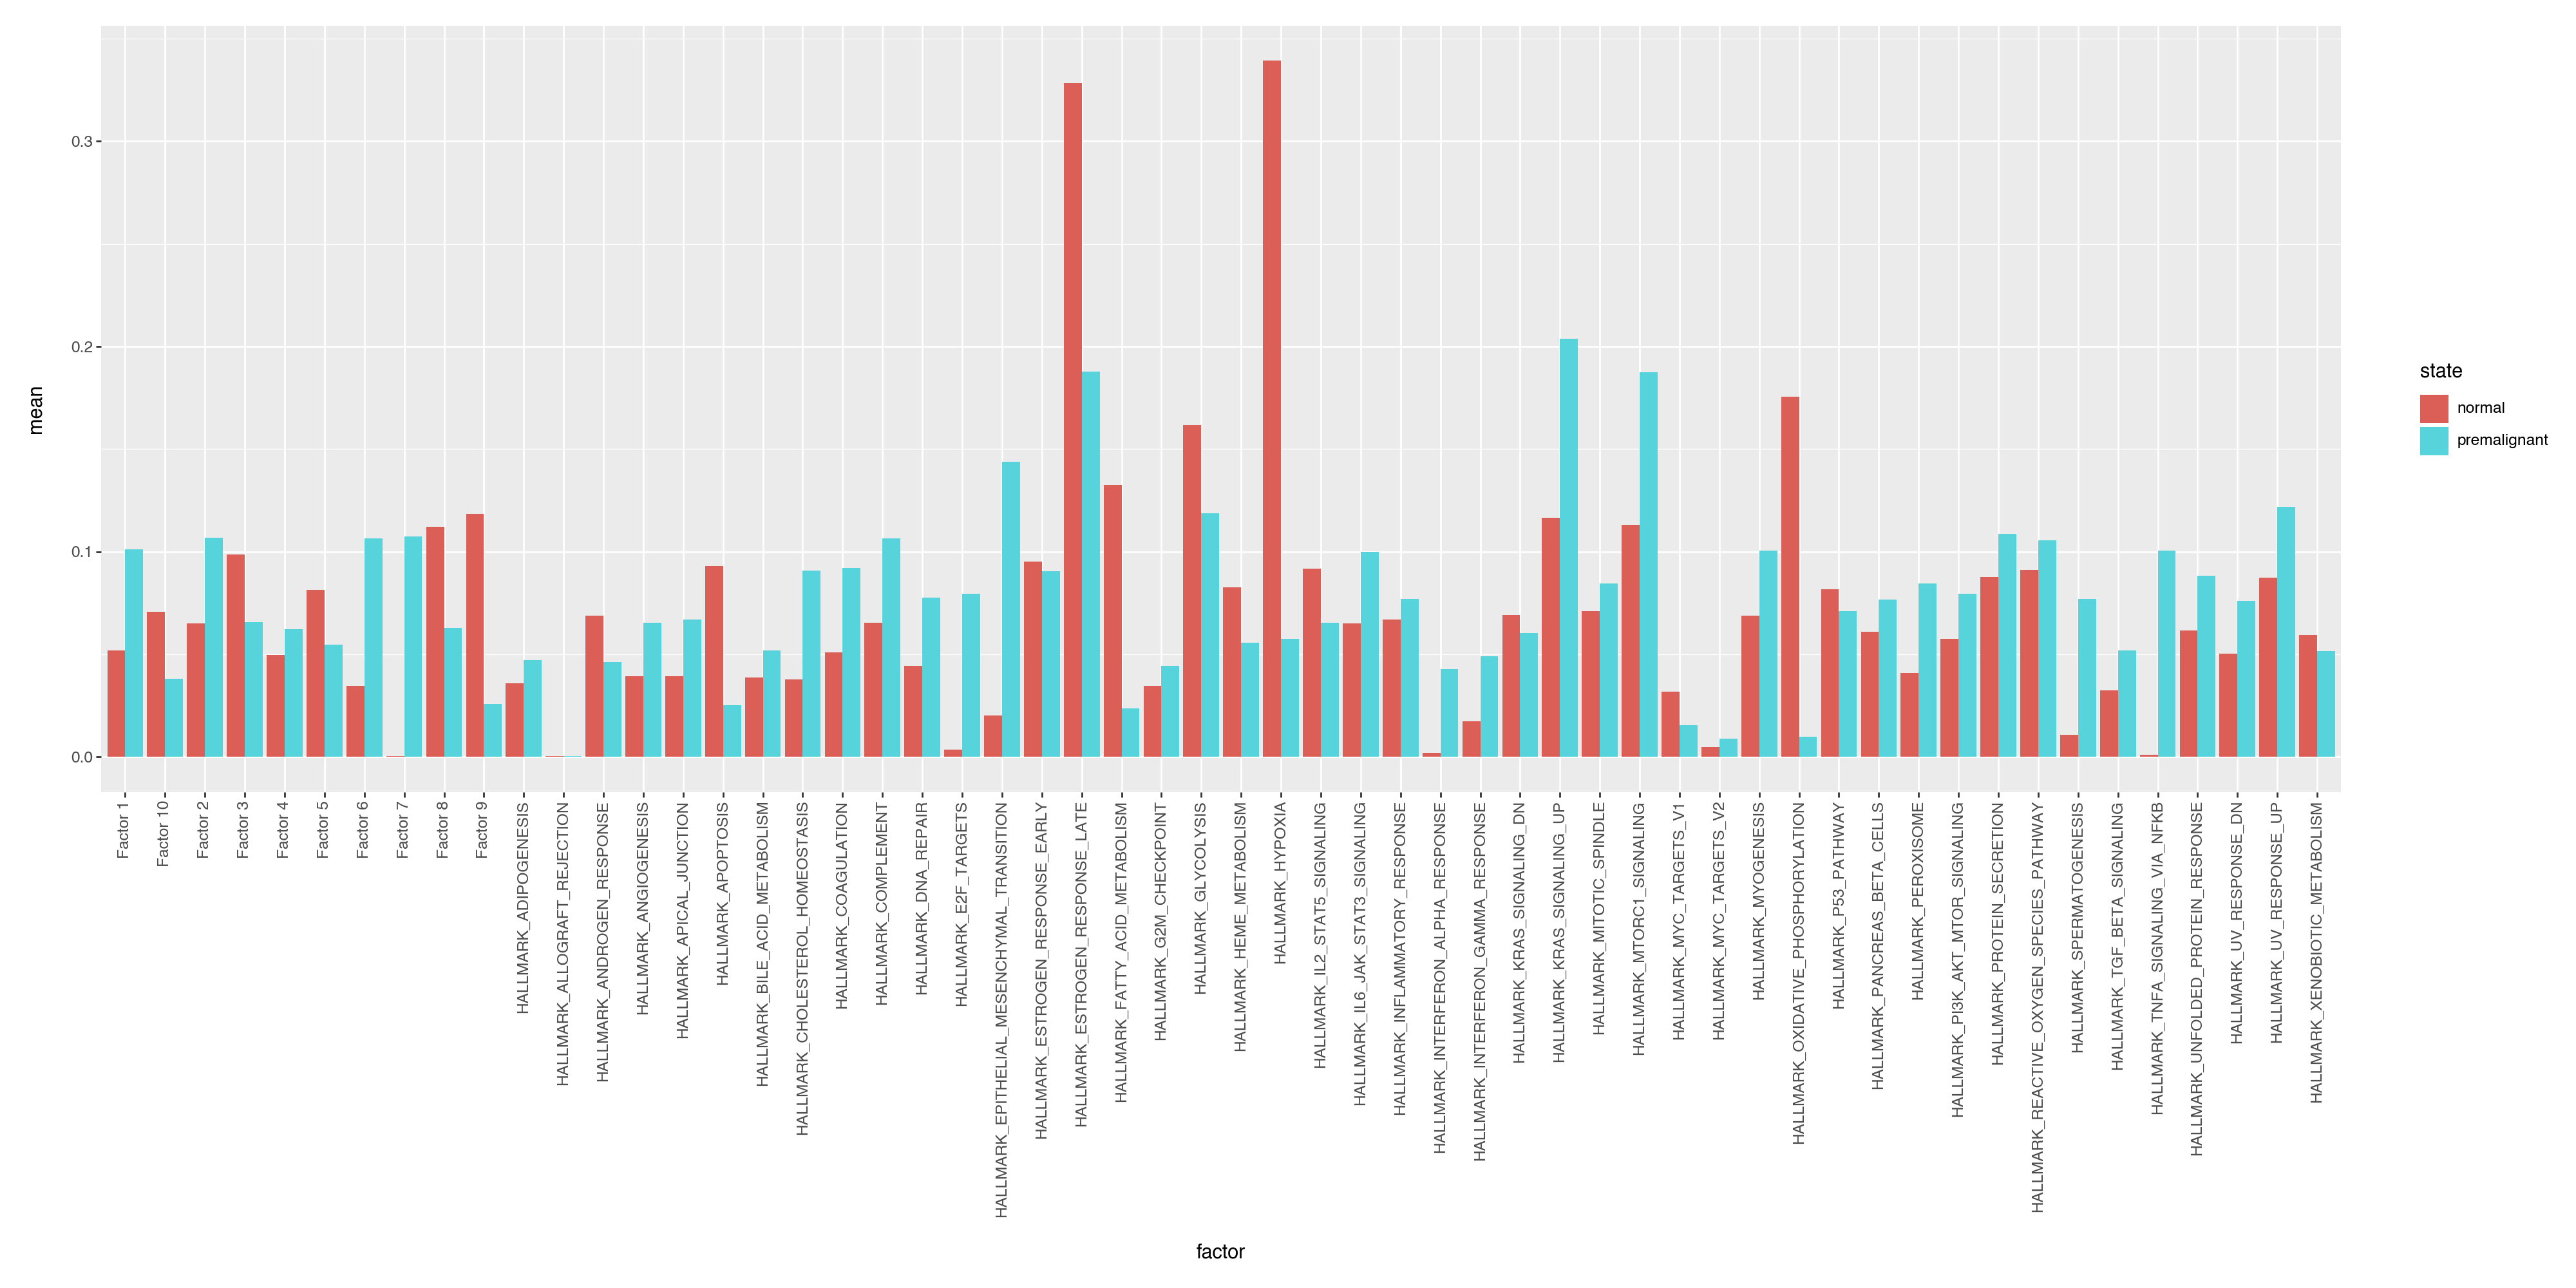

In [74]:
plot = (
    ggplot(z_long_grouped, aes(x="factor", y="mean", fill="state"))
    + geom_bar(stat="identity", position="dodge")
    + theme(figure_size=(20, 10), axis_text_x=element_text(angle=90))
)
plot.show()

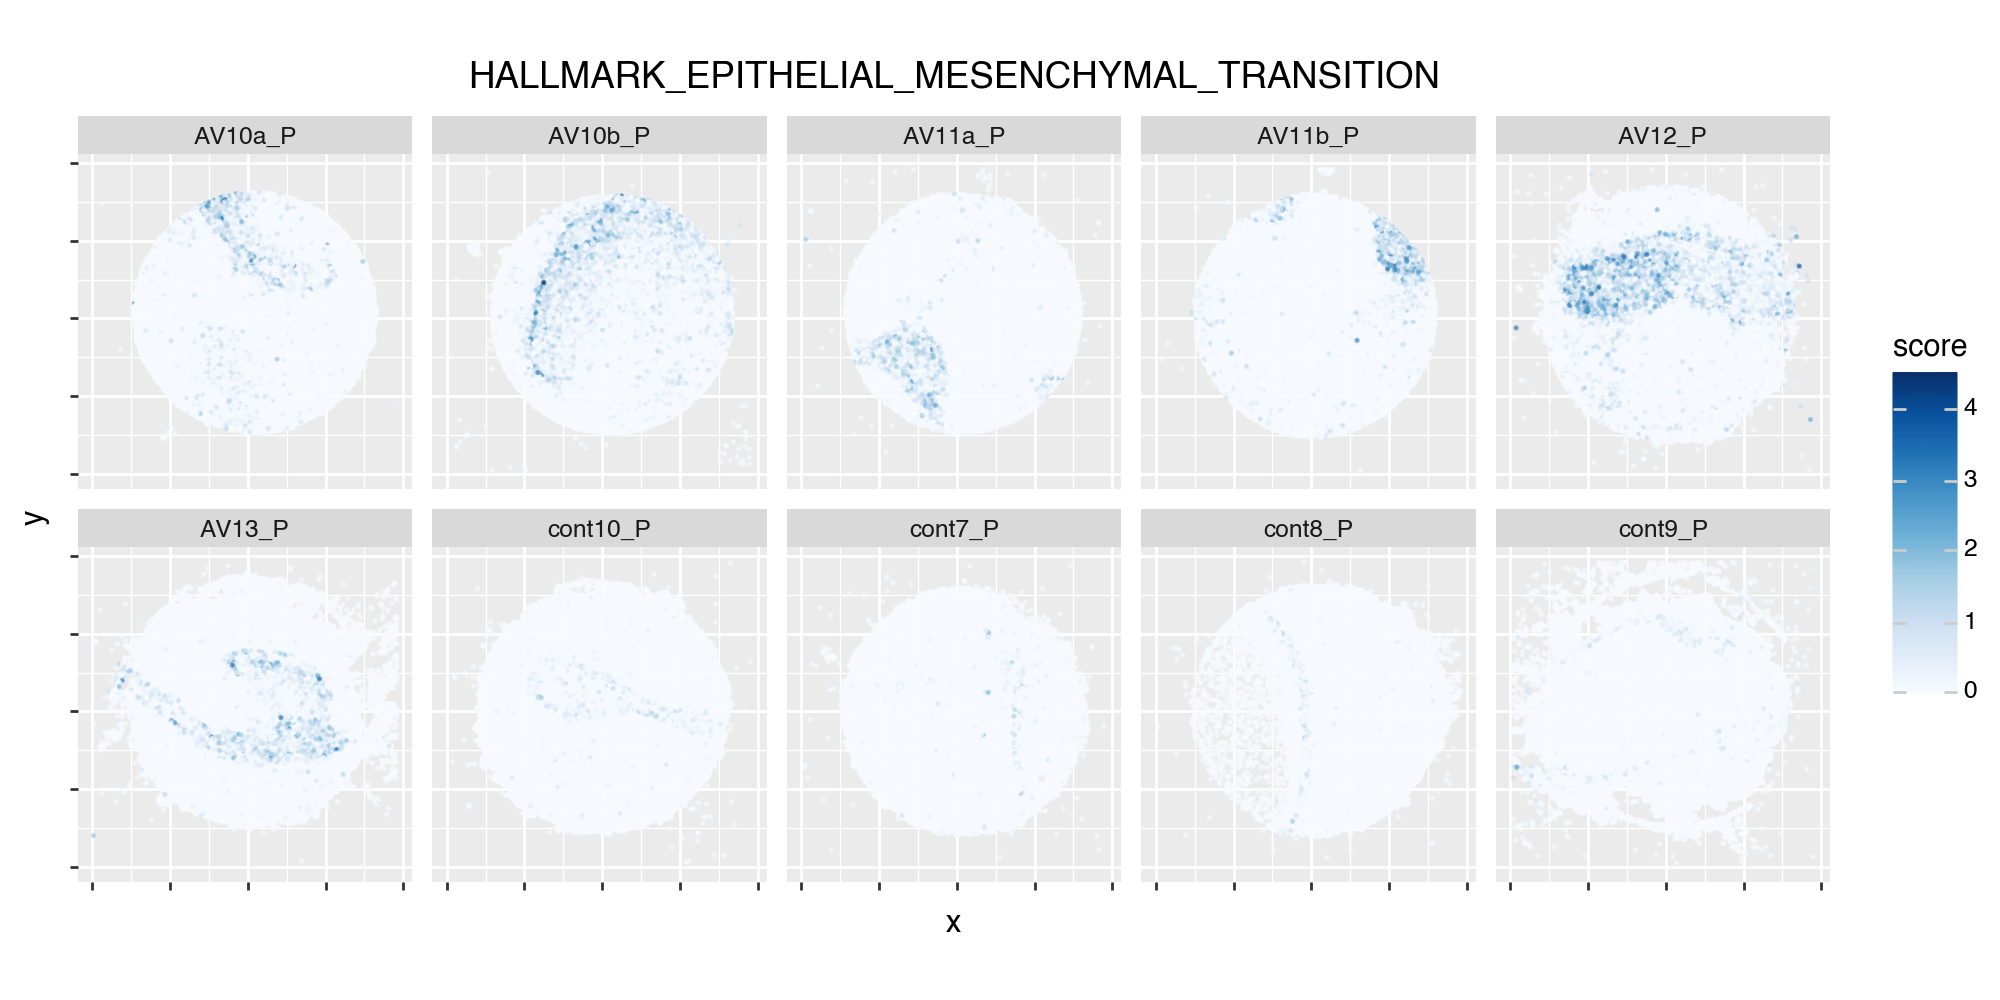

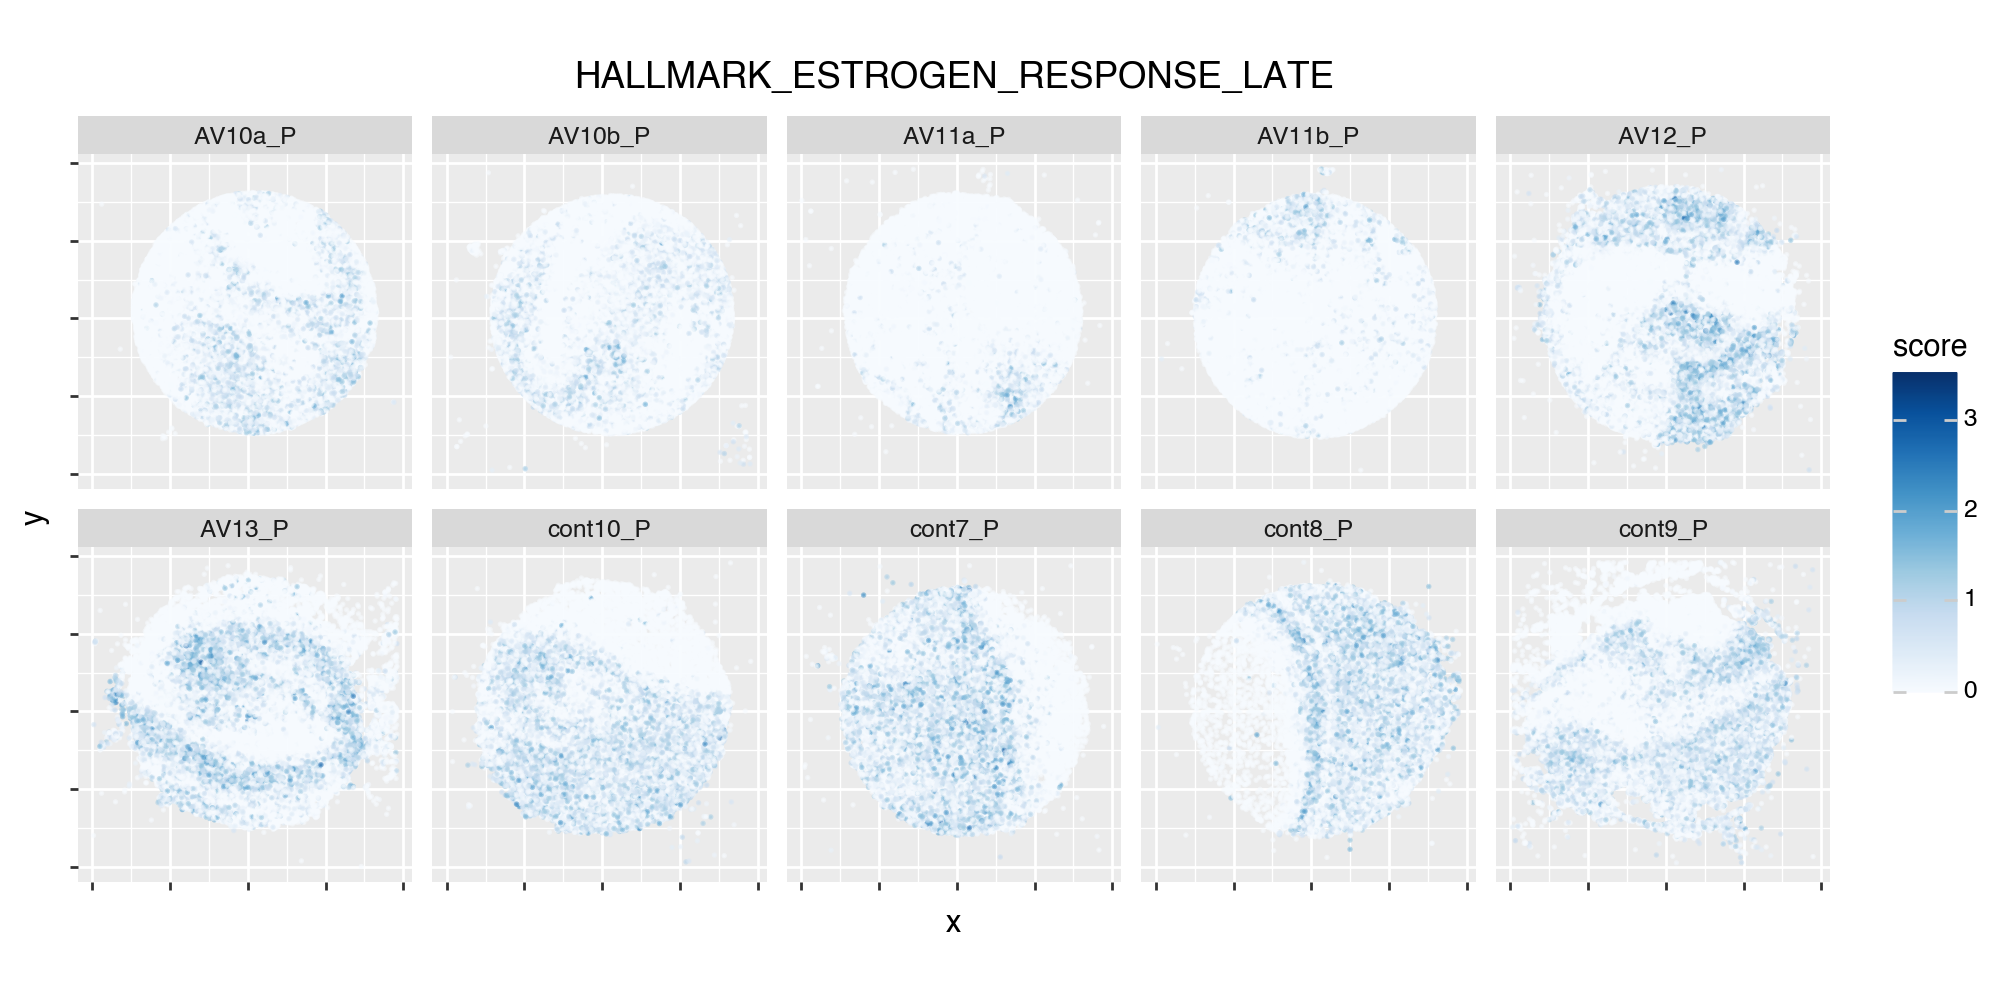

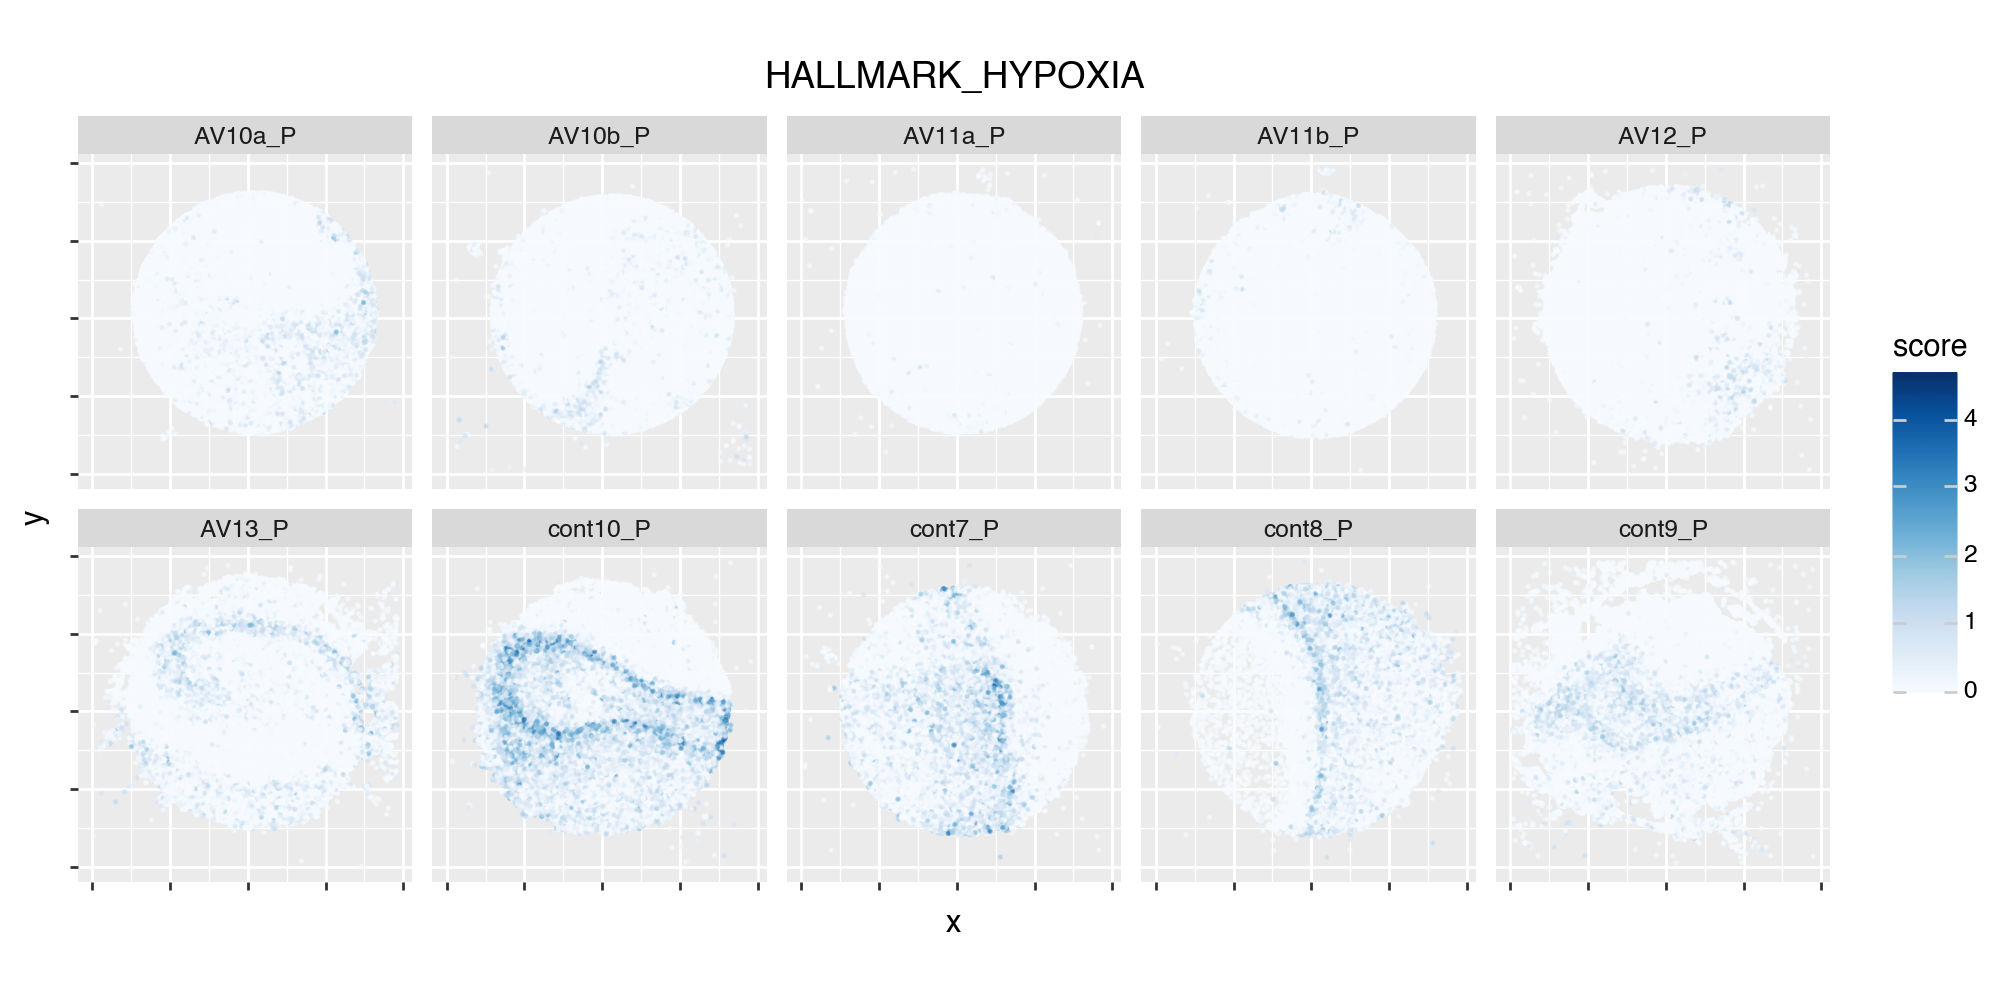

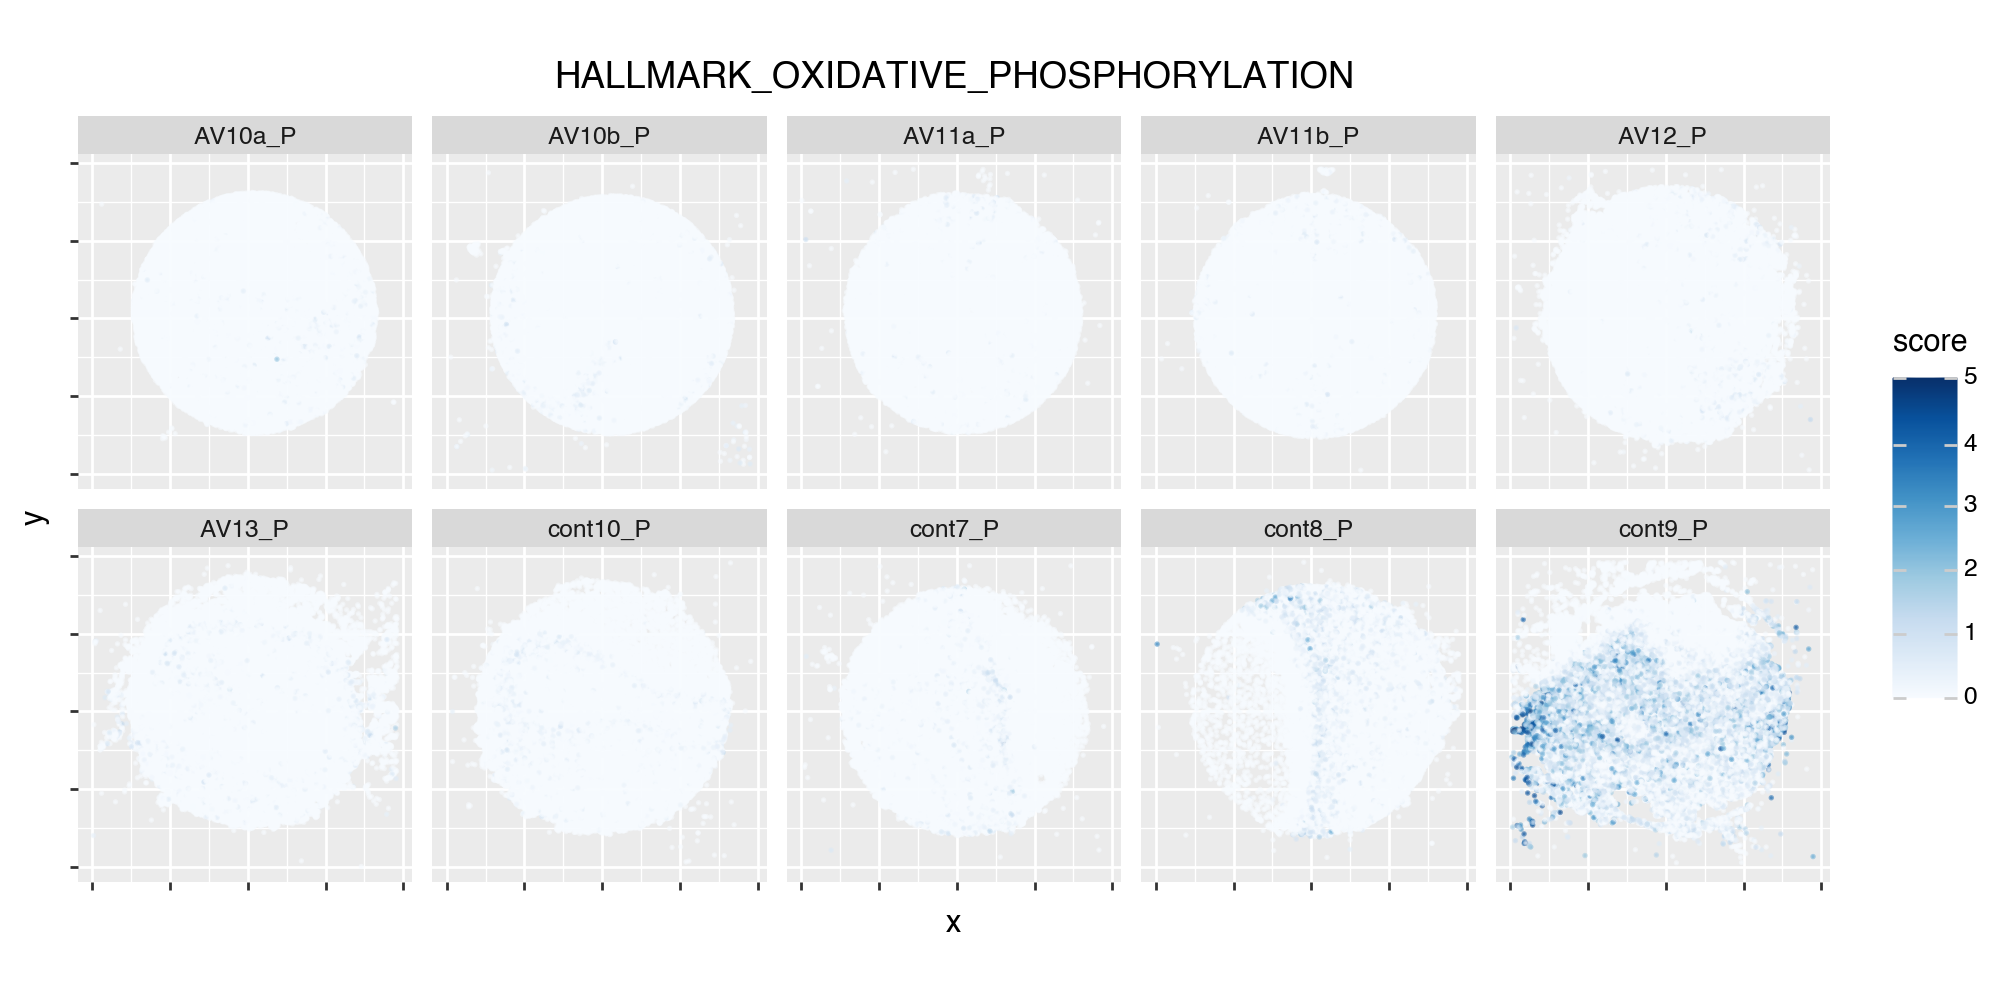

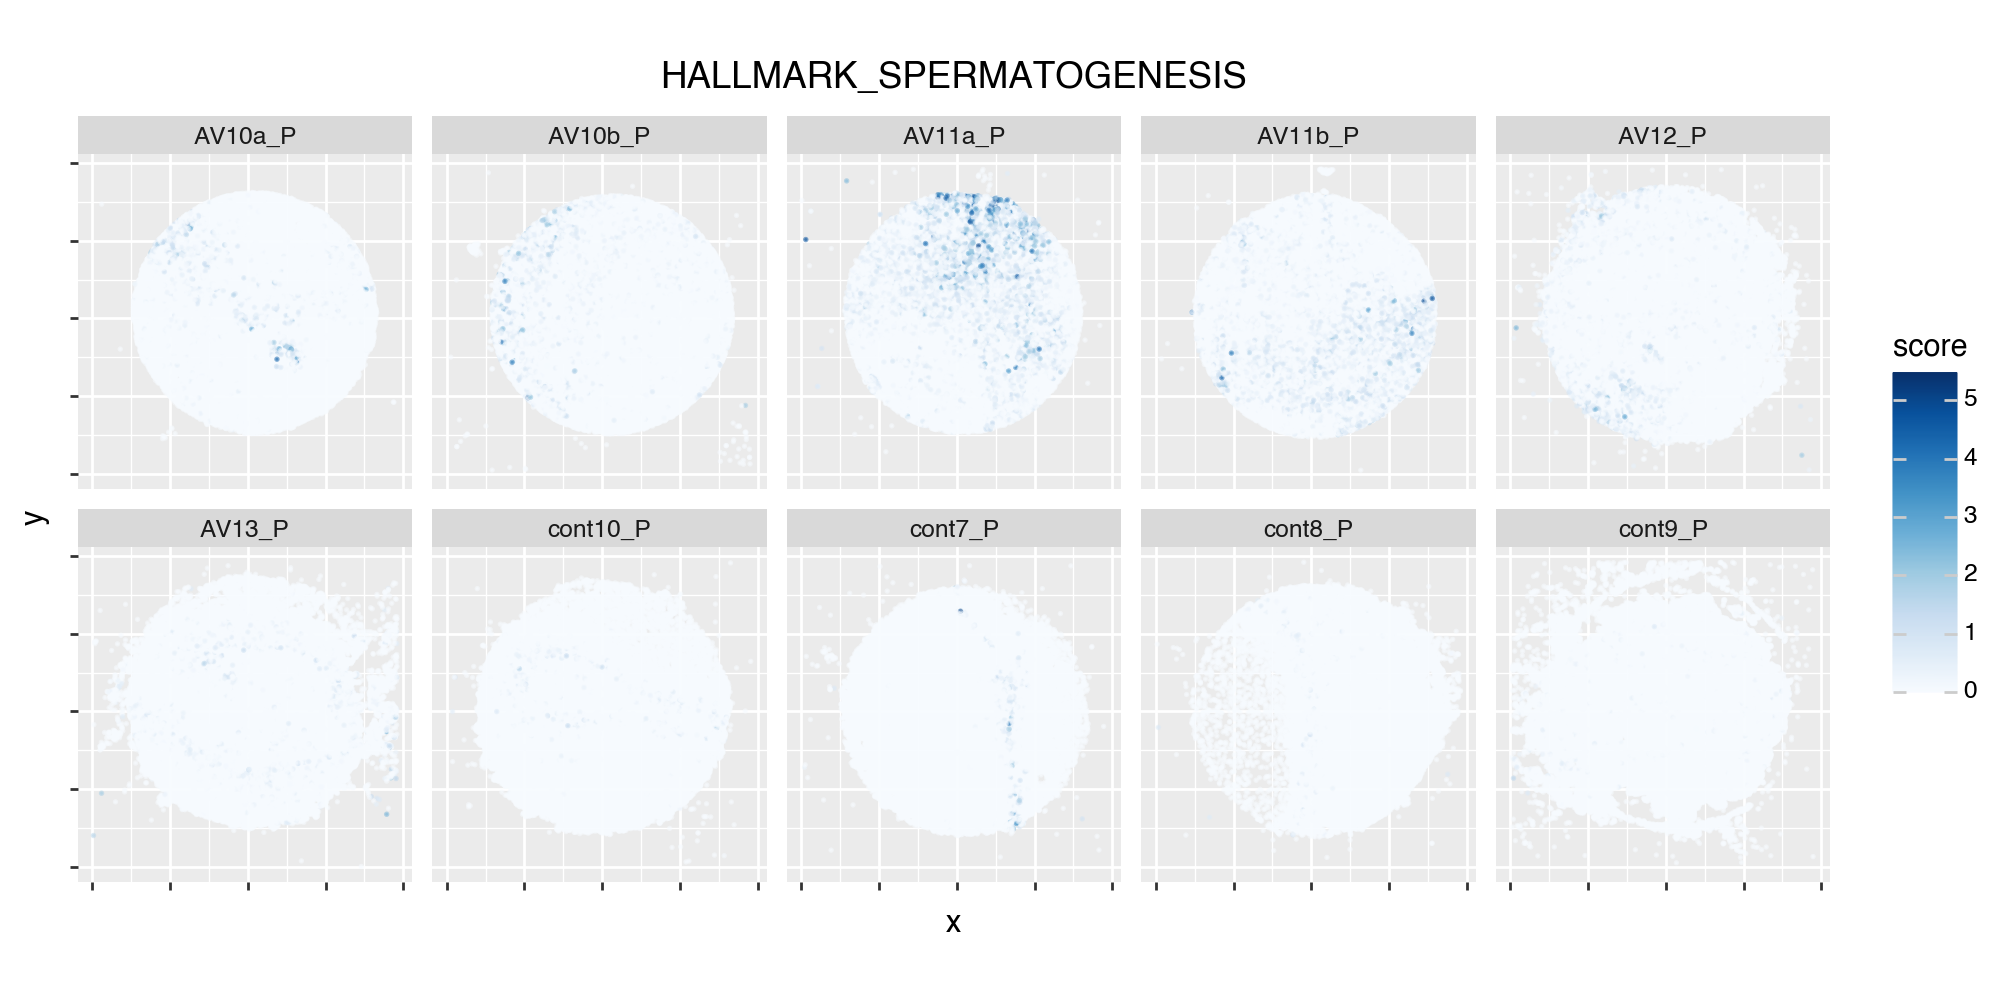

In [79]:
factors = [
    "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION",
    "HALLMARK_ESTROGEN_RESPONSE_LATE",
    "HALLMARK_HYPOXIA",
    "HALLMARK_OXIDATIVE_PHOSPHORYLATION",
    "HALLMARK_SPERMATOGENESIS",
]

for factor in factors:
    plot = (
        ggplot(z_long[z_long["factor"] == factor], aes(x="x", y="y", color="score"))
        + geom_point(size=0.1, alpha=0.5)
        + facet_wrap("group", ncol=5)
        + theme(figure_size=(10, 5), axis_text_x=element_blank(), axis_text_y=element_blank())
        + scale_color_cmap("Blues")
        + labs(title=factor)
        + coord_fixed(ratio=1)
    )
    plot.show()

In [71]:
r2_list = []
for group in model.get_r2().keys():
    r2 = model.get_r2()[group].rename(columns={"rna":group}).T
    r2["state"] = model._metadata[group]["rna"]["State"].values[0]
    r2_list.append(df)

r2 = pd.concat(r2_list, axis=0)
r2_long = df.melt(id_vars="state", var_name="factor", value_name="r2")
r2_long_grouped = r2_long.groupby(["state", "factor"])["r2"].agg(["mean", "std"]).reset_index()

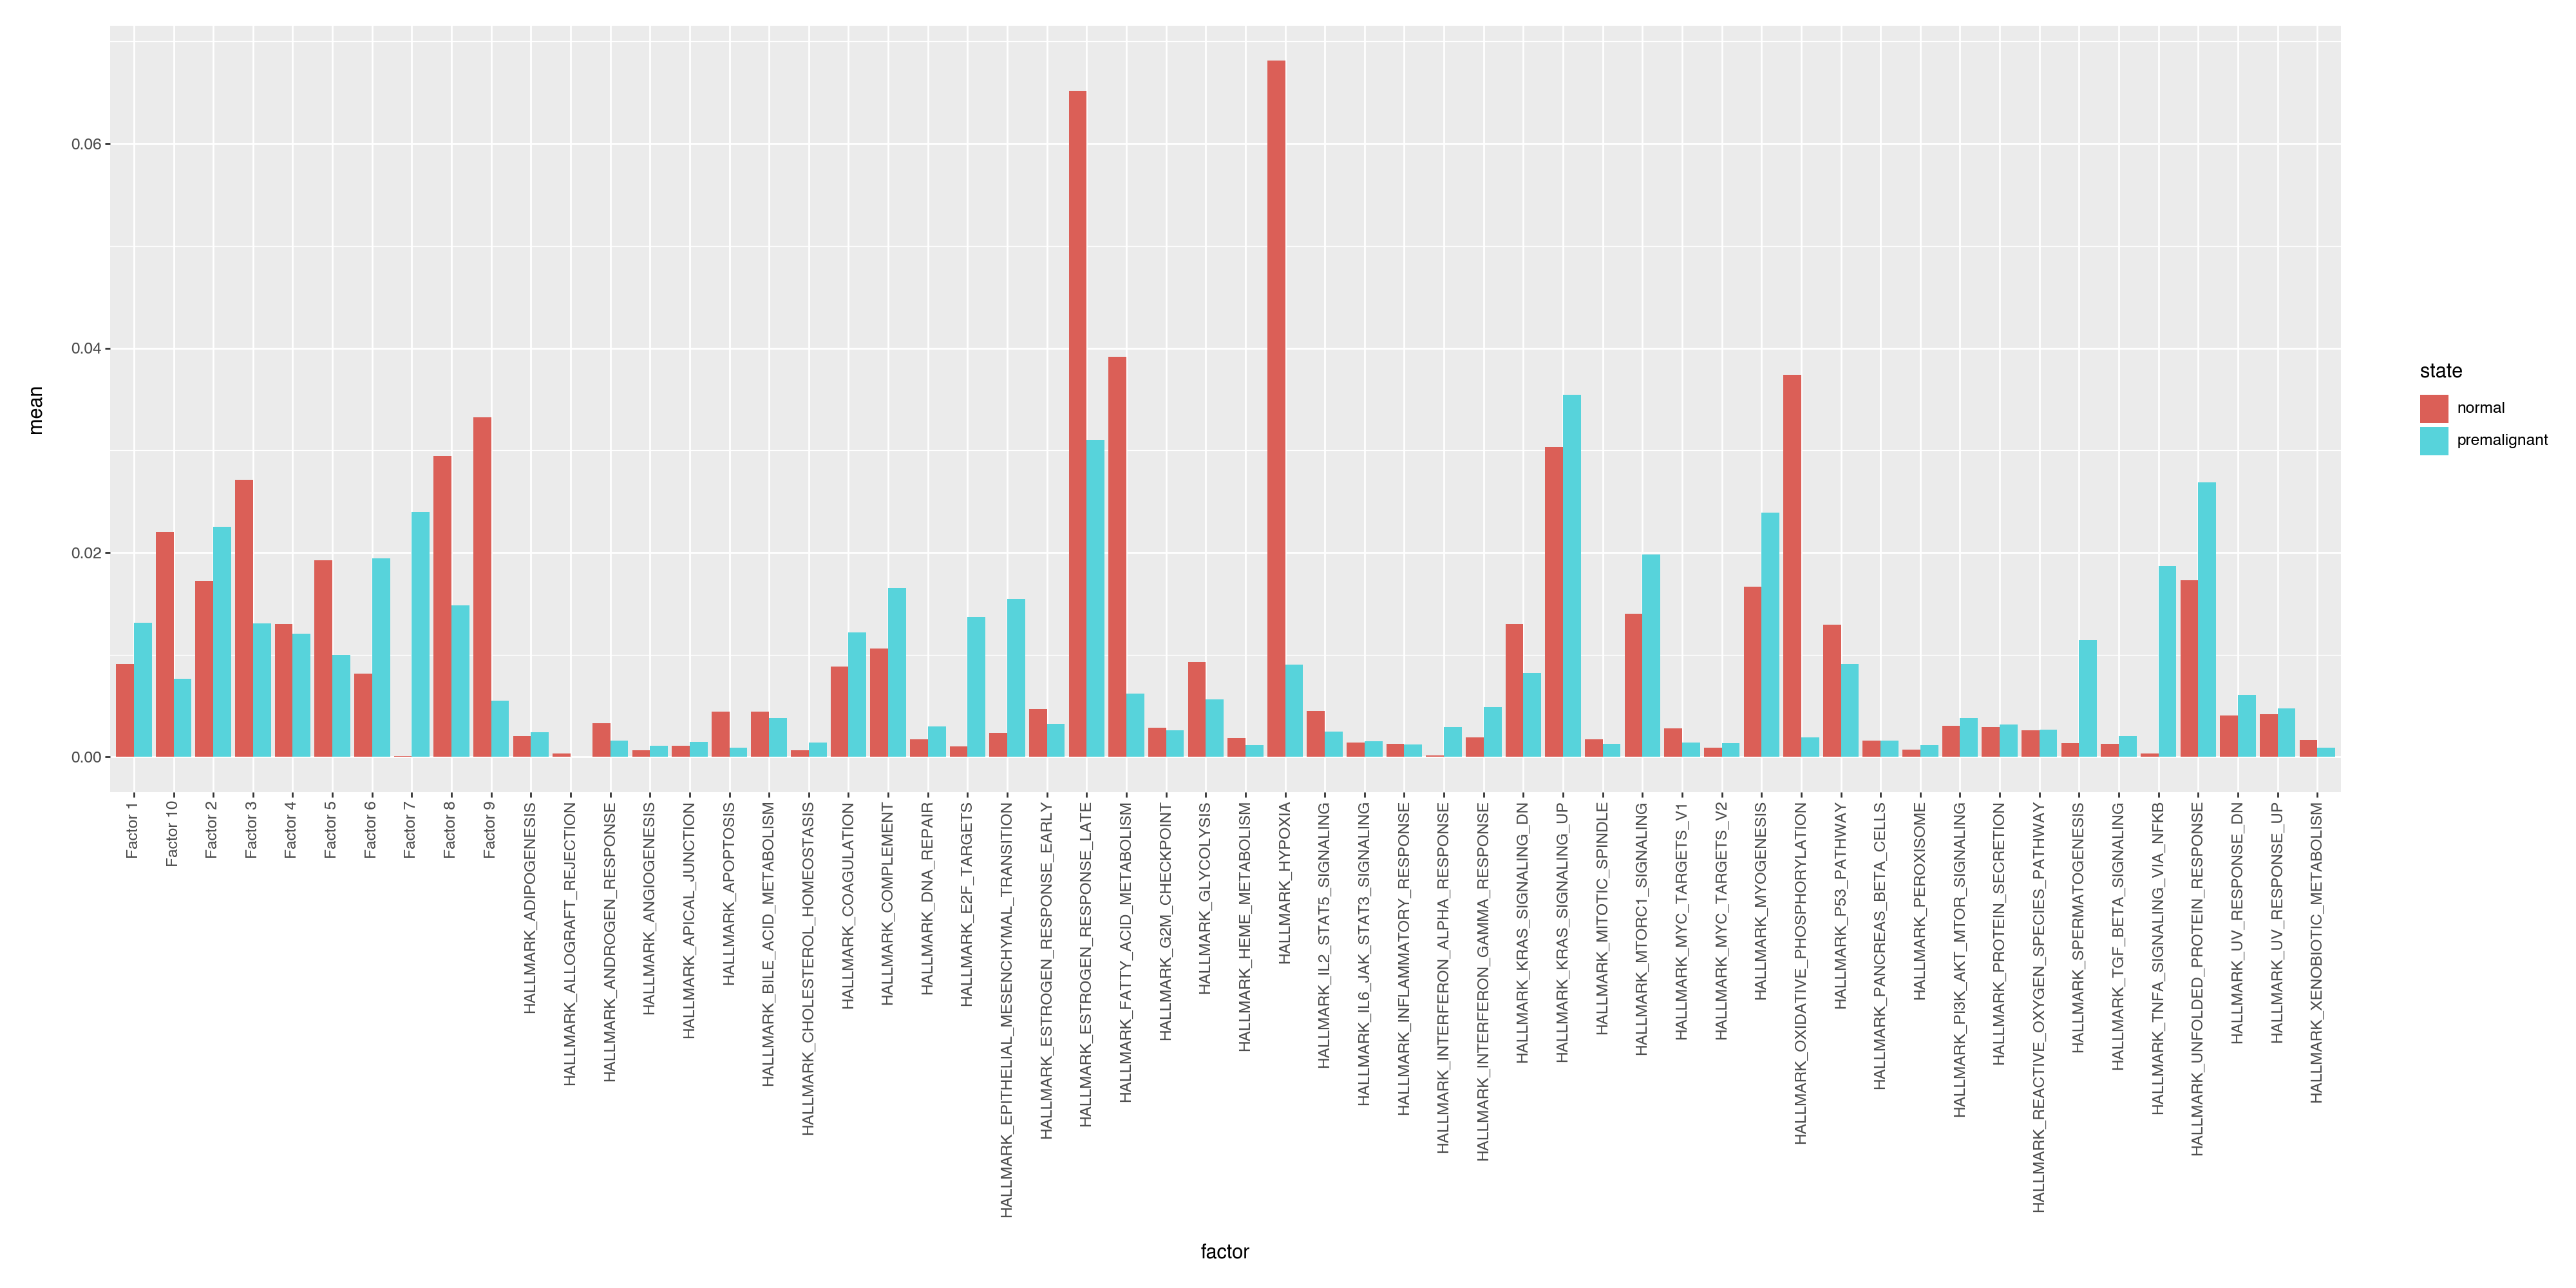

In [72]:
plot = (
    ggplot(r2_long_grouped, aes(x="factor", y="mean", fill="state"))
    + geom_bar(stat="identity", position="dodge")
    + theme(figure_size=(20, 10), axis_text_x=element_text(angle=90))
)
plot.show()

In [5]:
data_df = []
for group in model.group_names:
    data_df.append(data[group]["rna"].obs)
    data_df[-1]["group"] = group
data_df = pd.concat(data_df)

data_df

x         y  \
AV10a_P_GGCTGGTGTGCATT   746.850  2036.190   
AV10a_P_CAGTGAAACTGGGA  2687.360  1558.960   
AV10a_P_GTCACCTATACTTC  1216.670  2996.045   
AV10a_P_TTTTTTTTTTTTTT  2375.685  1475.695   
AV10a_P_GAGGCTAAGTACGC  2781.025  1404.195   
...                          ...       ...   
AV13_P_CGAAGGGTCTTAGT   1552.590  2412.865   
AV13_P_GTTGGAATACGCGG   1006.720  1238.185   
AV13_P_TAGTGTTGACAACT   1757.275   867.035   
AV13_P_GGTAACCGAATTCG   2793.765   712.595   
AV13_P_ACGGCTGACGCAGC   2721.420   942.565   

                                                         region         State  \
AV10a_P_GGCTGGTGTGCATT          Region 11 (Malignant-like, EMT)  premalignant   
AV10a_P_CAGTGAAACTGGGA  Region 6 (Malignant-like, inflammation)  premalignant   
AV10a_P_GTCACCTATACTTC          Region 11 (Malignant-like, EMT)  premalignant   
AV10a_P_TTTTTTTTTTTTTT  Region 6 (Malignant-like, inflammation)  premalignant   
AV10a_P_GAGGCTAAGTACGC                                 Region 0  premalignant   
...                                                         ...           ...   
AV13_P_CGAAGGGTCTTAGT   Region 1 (Stem cell niche - dysplastic)  premalignant   
AV13_P_GTTGGAATACGCGG                        Region 10 (Normal)  premalignant   
AV13_P_TAGTGTTGACAACT                                  Region 4  premalignant   
AV13_P_GGTAACCGAATTCG                        Region 10 (Normal)  premalignant   
AV13_P_ACGGCTGACGCAGC                                  Region 4  premalignant   

                       SampleID  epi_domain    group  
AV10a_P_GGCTGGTGTGCATT  AV10a_P        True  AV10a_P  
AV10a_P_CAGTGAAACTGGGA  AV10a_P        True  AV10a_P  
AV10a_P_GTCACCTATACTTC  AV10a_P        True  AV10a_P  
AV10a_P_TTTTTTTTTTTTTT  AV10a_P        True  AV10a_P  
AV10a_P_GAGGCTAAGTACGC  AV10a_P        True  AV10a_P  
...                         ...         ...      ...  
AV13_P_CGAAGGGTCTTAGT    AV13_P        True   AV13_P  
AV13_P_GTTGGAATACGCGG    AV13_P        True   AV13_P  
AV13_P_TAGTGTTGACAACT    AV13_P        True   AV13_P  
AV13_P_GGTAACCGAATTCG    AV13_P        True   AV13_P  
AV13_P_ACGGCTGACGCAGC    AV13_P        True   AV13_P  

[385428 rows x 7 columns]

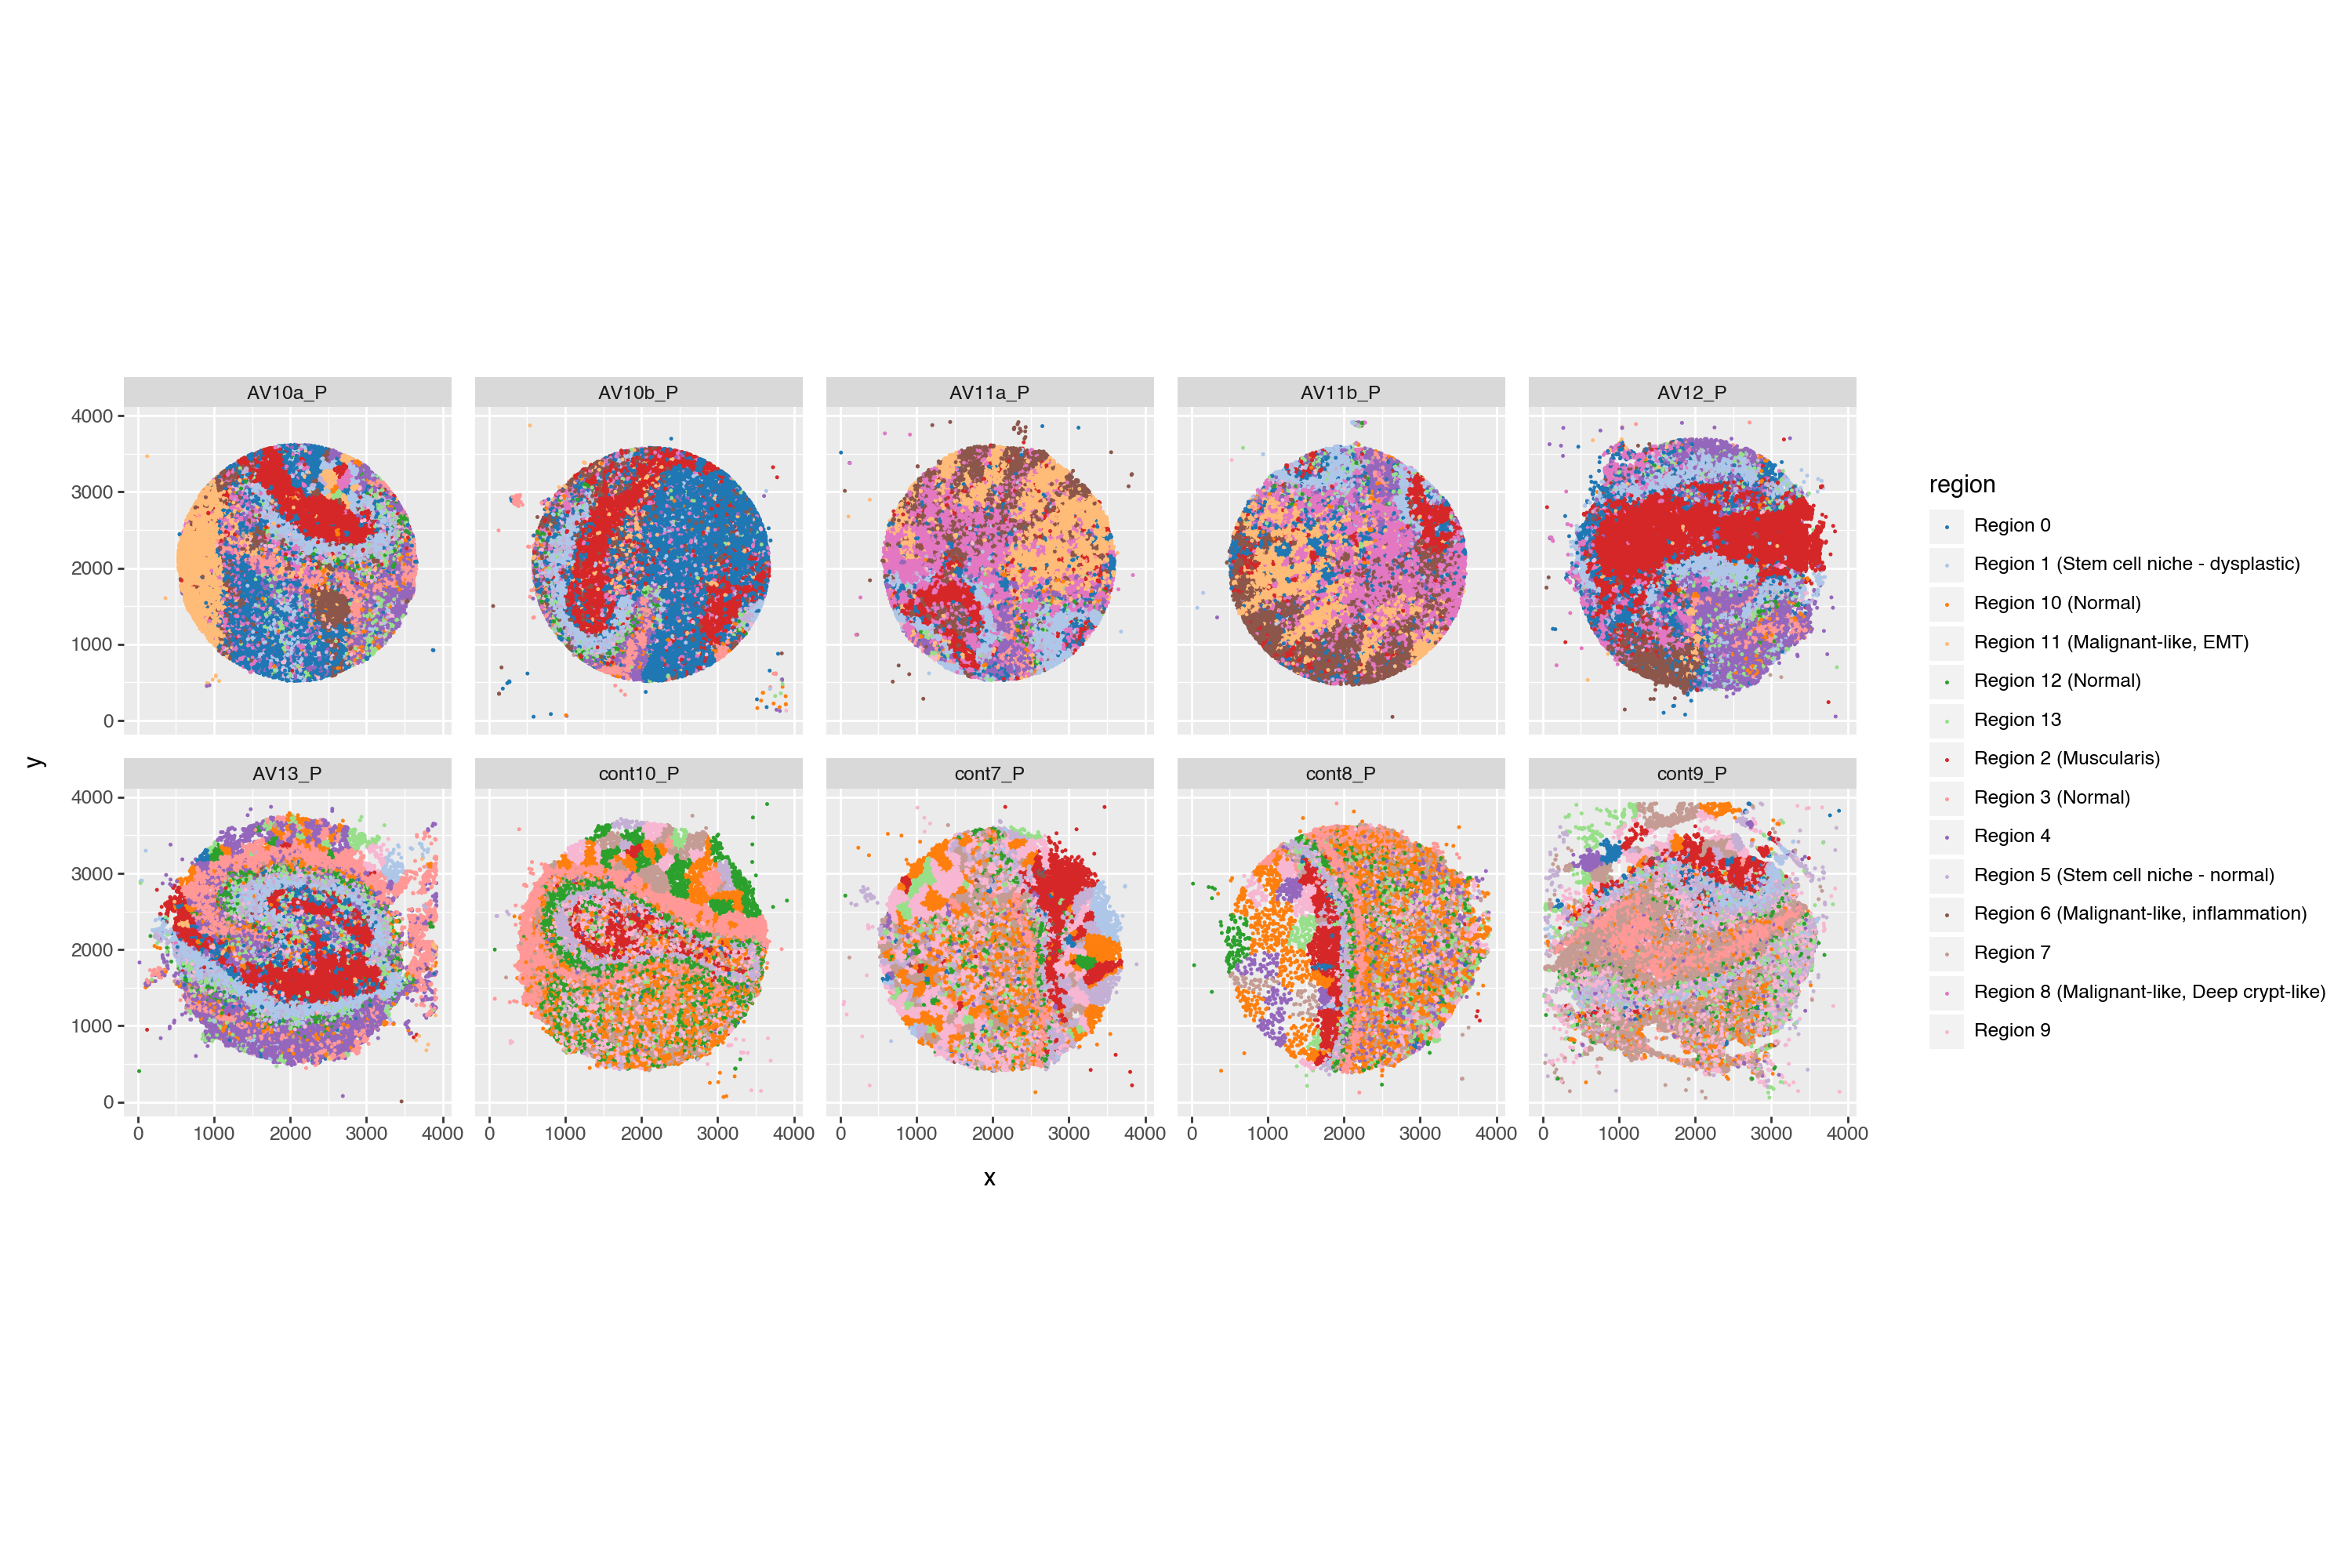

In [7]:
plot = (
    ggplot(data_df, aes(x="x", y="y", color="region"))
    + geom_point(size=0.01)
    + theme(figure_size=(15, 10))
    + scale_color_manual(values=tab20_colors)
    + facet_wrap("~group", ncol=5)
    + coord_fixed()
)
plot.show()